In [45]:
import os
#os.environ["R_HOME"] = r"C:\Program Files\R\R-4.2.1"
#os.environ['path'] += r";C:\Program Files\R\R-4.2.1"
#from rpy2.robjects import r
#from rpy2.robjects.conversion import localconverter
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import seaborn as sns 
import torch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import networkx as nx
from MultyGraphModel import BiGraphAutoEncoder
from Utils import crate_anndata
from random import seed
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from Utils import calculate_aupr, propagate_all_genes, load_obj, save_obj
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.utils import  convert
from torch_geometric.data import Data
from torch_geometric.nn import sequential, GATConv, GraphNorm, VGAE, GCNConv, InnerProductDecoder, GAE
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
from torch_geometric.utils import train_test_split_edges
import matplotlib.pyplot as plt
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
import mygene
import scipy.sparse as sparse
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from geneEmbbdeing import gene_embdding_anaylsis_pipeline, run_network_predication
import Utils as ut
import coEmbeddedNetwork as cen

In [60]:
import imp
imp.reload(cen)


<module 'coEmbeddedNetwork' from '/Users/ronsheinin/Desktop/scNET/coEmbeddedNetwork.py'>

/Users/ronsheinin/Desktop/scNET/coEmbeddedNetwork.py:184: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(ax=ax, data=df,x="Method", y="ROCAUC", palette=custom_palette)


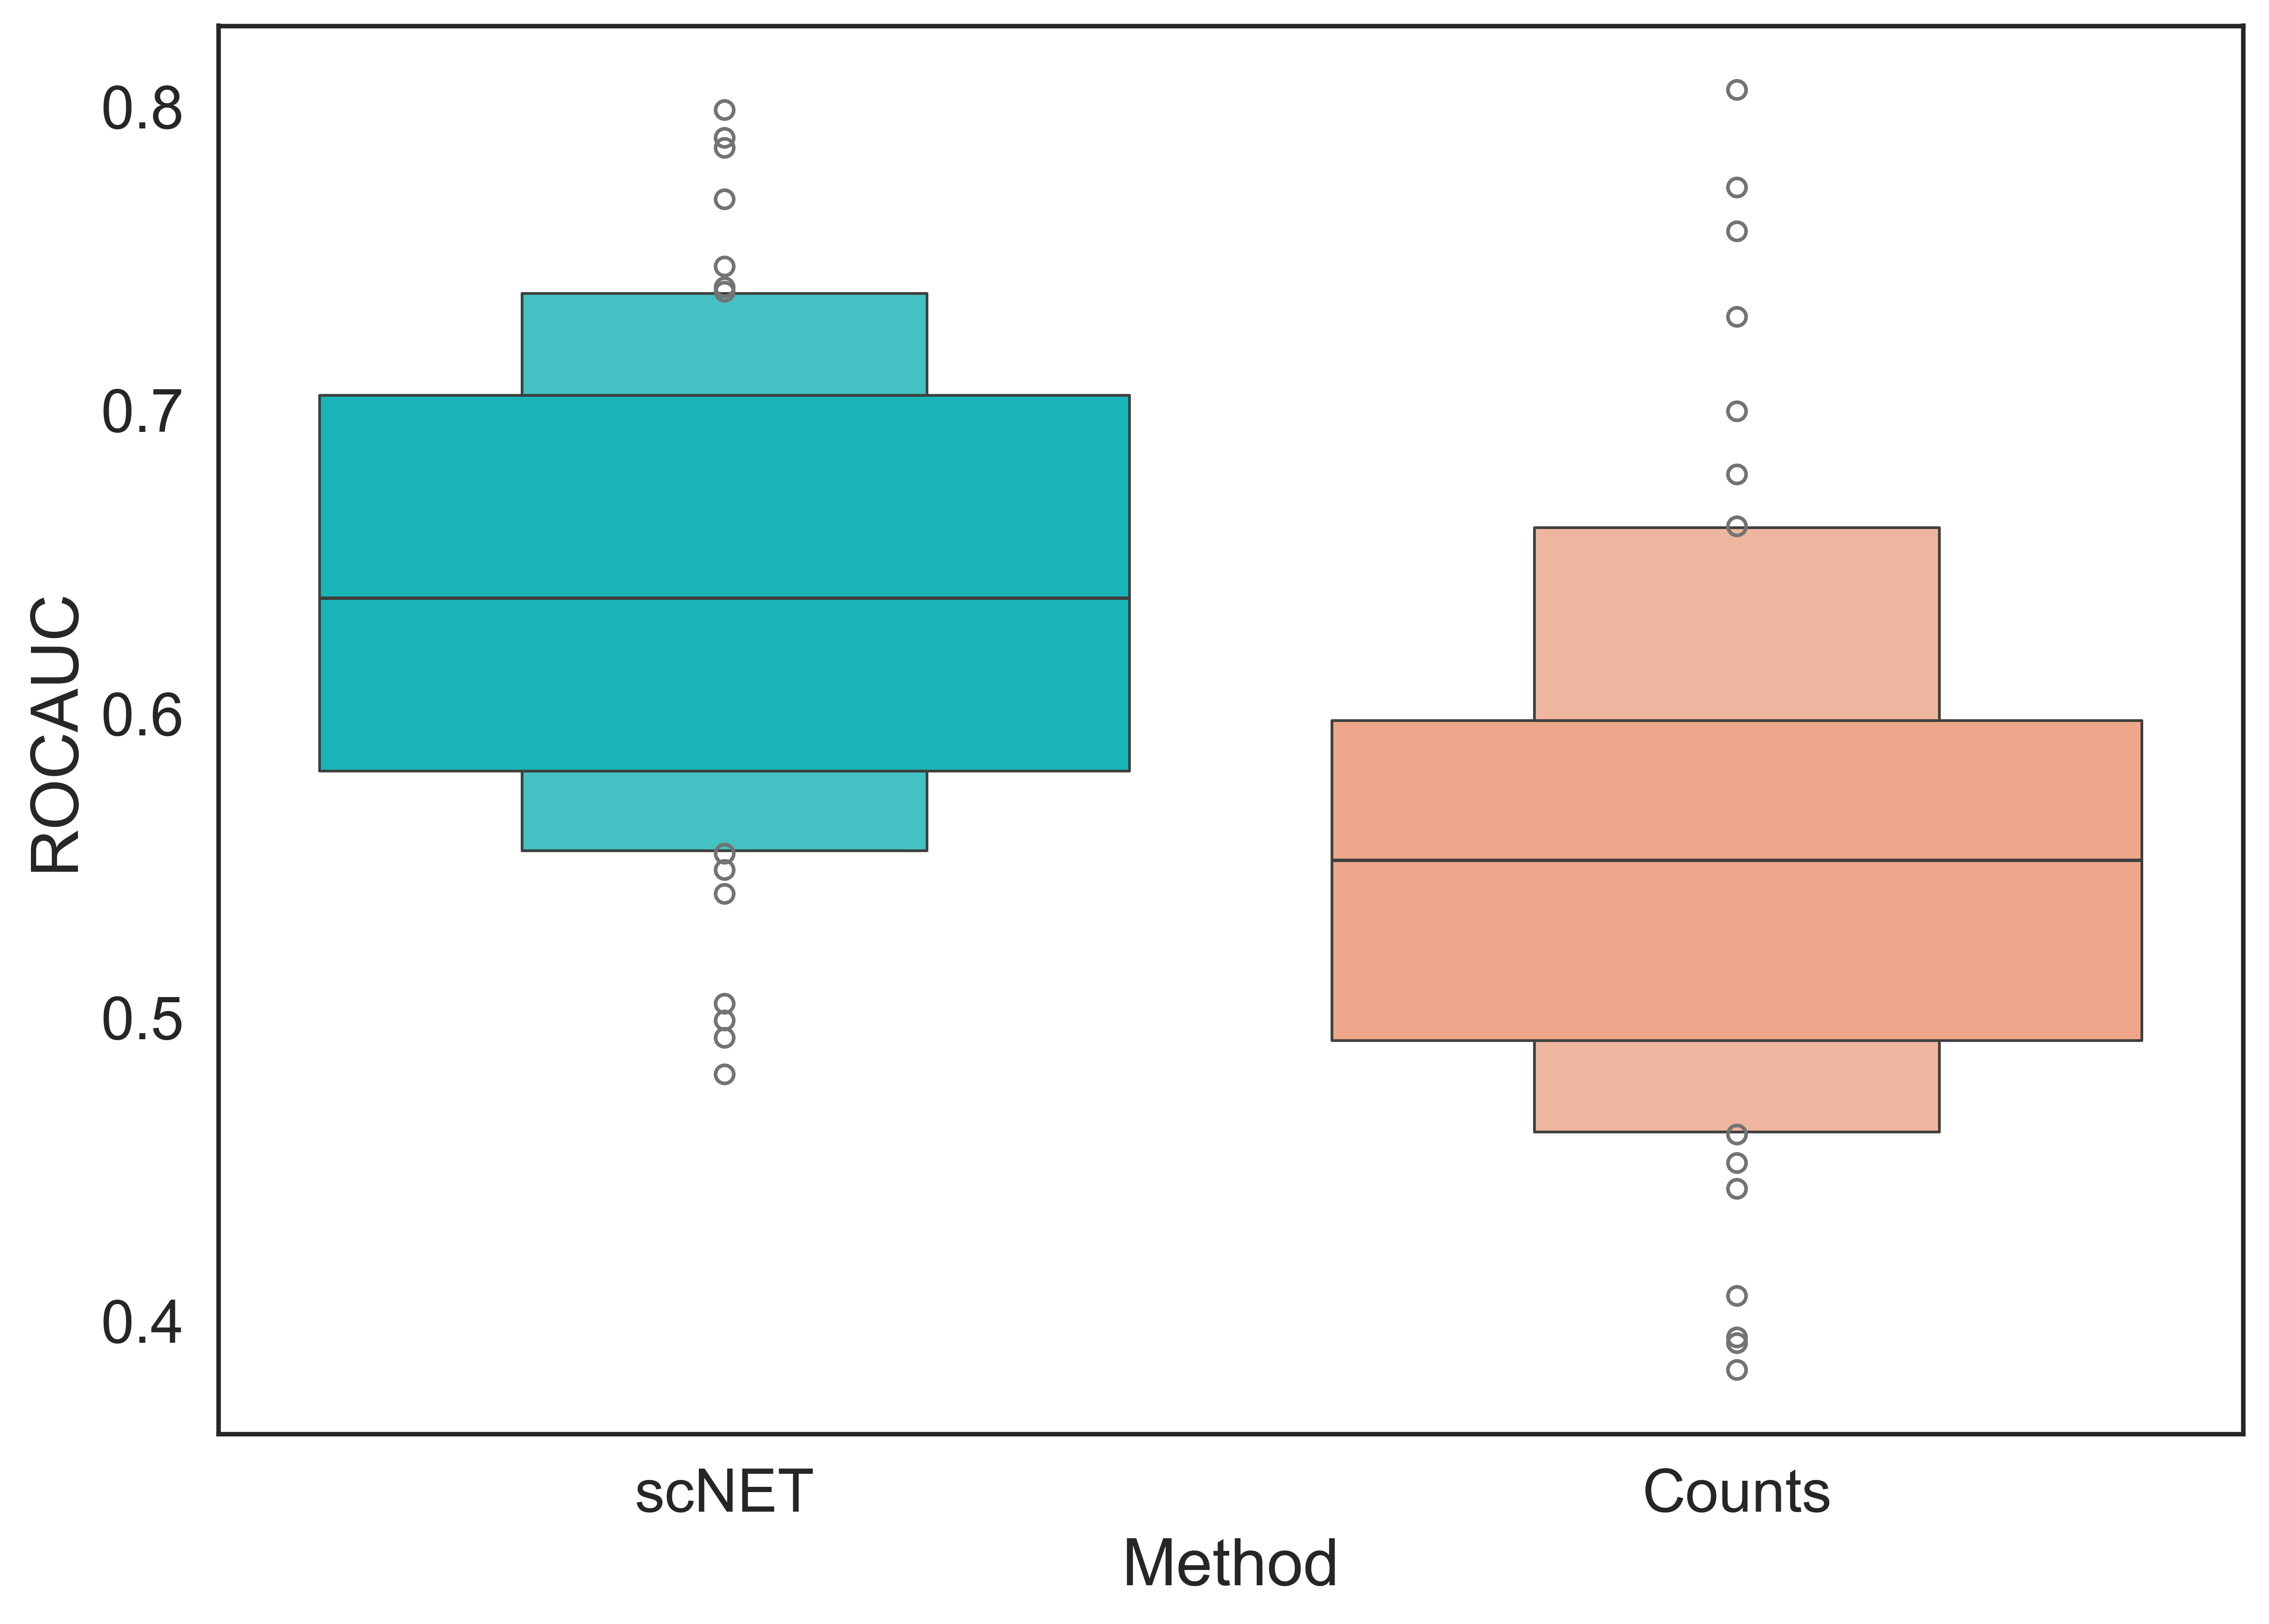

,ROCAUC,Method
0,0.631742,scNET
1,0.627230,scNET
2,0.540662,scNET
3,0.708495,scNET
4,0.618647,scNET
...,...,...
95,0.451982,Counts
96,0.576459,Counts
97,0.611113,Counts
98,0.494169,Counts


In [61]:
cen.predict_kegg(gene_embedding,node_feature)

In [64]:
gene_embedding, cell_embedding, node_feature = cen.load_embeddings("_example")

         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/ronsheinin/anaconda3/envs/scNET/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/ronsheinin/anaconda3/envs/scNET/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/ronsheinin/anaconda3/envs/scNET/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


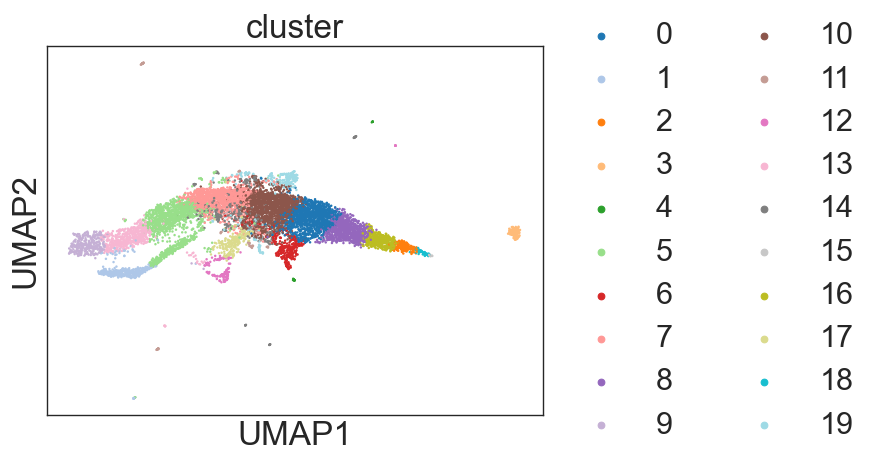

array([16, 16,  2, ...,  9,  9,  1], dtype=int32)

In [65]:
cen.plot_gene_umap_clustring(gene_embedding)

In [52]:
node_feature

,CELL_000001,CELL_000002,CELL_000003,CELL_000004,CELL_000005,CELL_000006,CELL_000007,CELL_000008,CELL_000009,CELL_000010,...,CELL_000931,CELL_000932,CELL_000933,CELL_000934,CELL_000935,CELL_000939,CELL_000943,CELL_000946,CELL_000955,CELL_000965
ABL1,0.158729,0.038694,0.073965,0.000000,0.039392,0.078590,0.041172,0.041989,0.042984,0.043776,...,0.000000,0.138078,0.000000,0.152924,0.000000,0.106577,0.000000,0.282747,0.000000,0.000000
CDKN1A,0.000000,0.000000,0.000000,0.038537,0.075853,0.113563,0.000000,0.000000,0.000000,0.000000,...,0.426825,0.244520,0.000000,0.267736,0.158888,0.000000,0.258401,0.000000,0.000000,0.000000
PARP1,0.666038,0.583188,0.525824,0.527114,0.545554,0.639432,0.570789,0.565562,0.584469,0.541802,...,0.667038,0.776475,0.593779,0.835949,0.688150,0.725743,0.622523,0.618185,0.849039,0.405979
AKT1,0.069895,0.139111,0.167115,0.038537,0.109745,0.040869,0.041172,0.116447,0.152873,0.155381,...,0.000000,0.000000,0.111327,0.152924,0.369562,0.193549,0.146917,0.376550,0.000000,0.247961
APP,0.444736,0.291321,0.167115,0.167731,0.273117,0.365119,0.114345,0.262745,0.315450,0.341983,...,0.263295,0.330173,0.201392,0.673988,0.651099,0.266469,0.258401,0.618185,0.000000,0.140259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WDSUB1,0.000000,0.107935,0.107105,0.038537,0.039392,0.000000,0.079151,0.041989,0.119000,0.121024,...,0.000000,0.138078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CCDC122,0.069895,0.107935,0.107105,0.038537,0.141368,0.040869,0.079151,0.041989,0.042984,0.000000,...,0.000000,0.000000,0.000000,0.152924,0.158888,0.106577,0.000000,0.282747,0.000000,0.140259
MDGA1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.263295,0.000000,0.000000,0.000000,0.000000,0.000000,0.146917,0.000000,0.000000,0.000000
SMIM43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.152924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


2024-05-21 12:13:16,324 [INFO] Input dict object named with gs_ind_0
2024-05-21 12:13:16,324 [INFO] Run: gs_ind_0 
2024-05-21 12:13:16,620 [INFO] Done.
2024-05-21 12:13:16,621 [INFO] Input dict object named with gs_ind_0
2024-05-21 12:13:16,621 [INFO] Run: gs_ind_0 
2024-05-21 12:13:16,829 [INFO] Done.
2024-05-21 12:13:16,830 [INFO] Input dict object named with gs_ind_0
2024-05-21 12:13:16,831 [INFO] Run: gs_ind_0 
2024-05-21 12:13:16,963 [INFO] Done.
2024-05-21 12:13:16,964 [INFO] Input dict object named with gs_ind_0
2024-05-21 12:13:16,964 [INFO] Run: gs_ind_0 
2024-05-21 12:13:17,287 [INFO] Done.
2024-05-21 12:13:17,288 [INFO] Input dict object named with gs_ind_0
2024-05-21 12:13:17,289 [INFO] Run: gs_ind_0 
2024-05-21 12:13:17,650 [INFO] Done.
2024-05-21 12:13:17,651 [INFO] Input dict object named with gs_ind_0
2024-05-21 12:13:17,652 [INFO] Run: gs_ind_0 
2024-05-21 12:13:17,690 [INFO] Done.
2024-05-21 12:13:17,691 [INFO] Input dict object named with gs_ind_0
2024-05-21 12:13:17

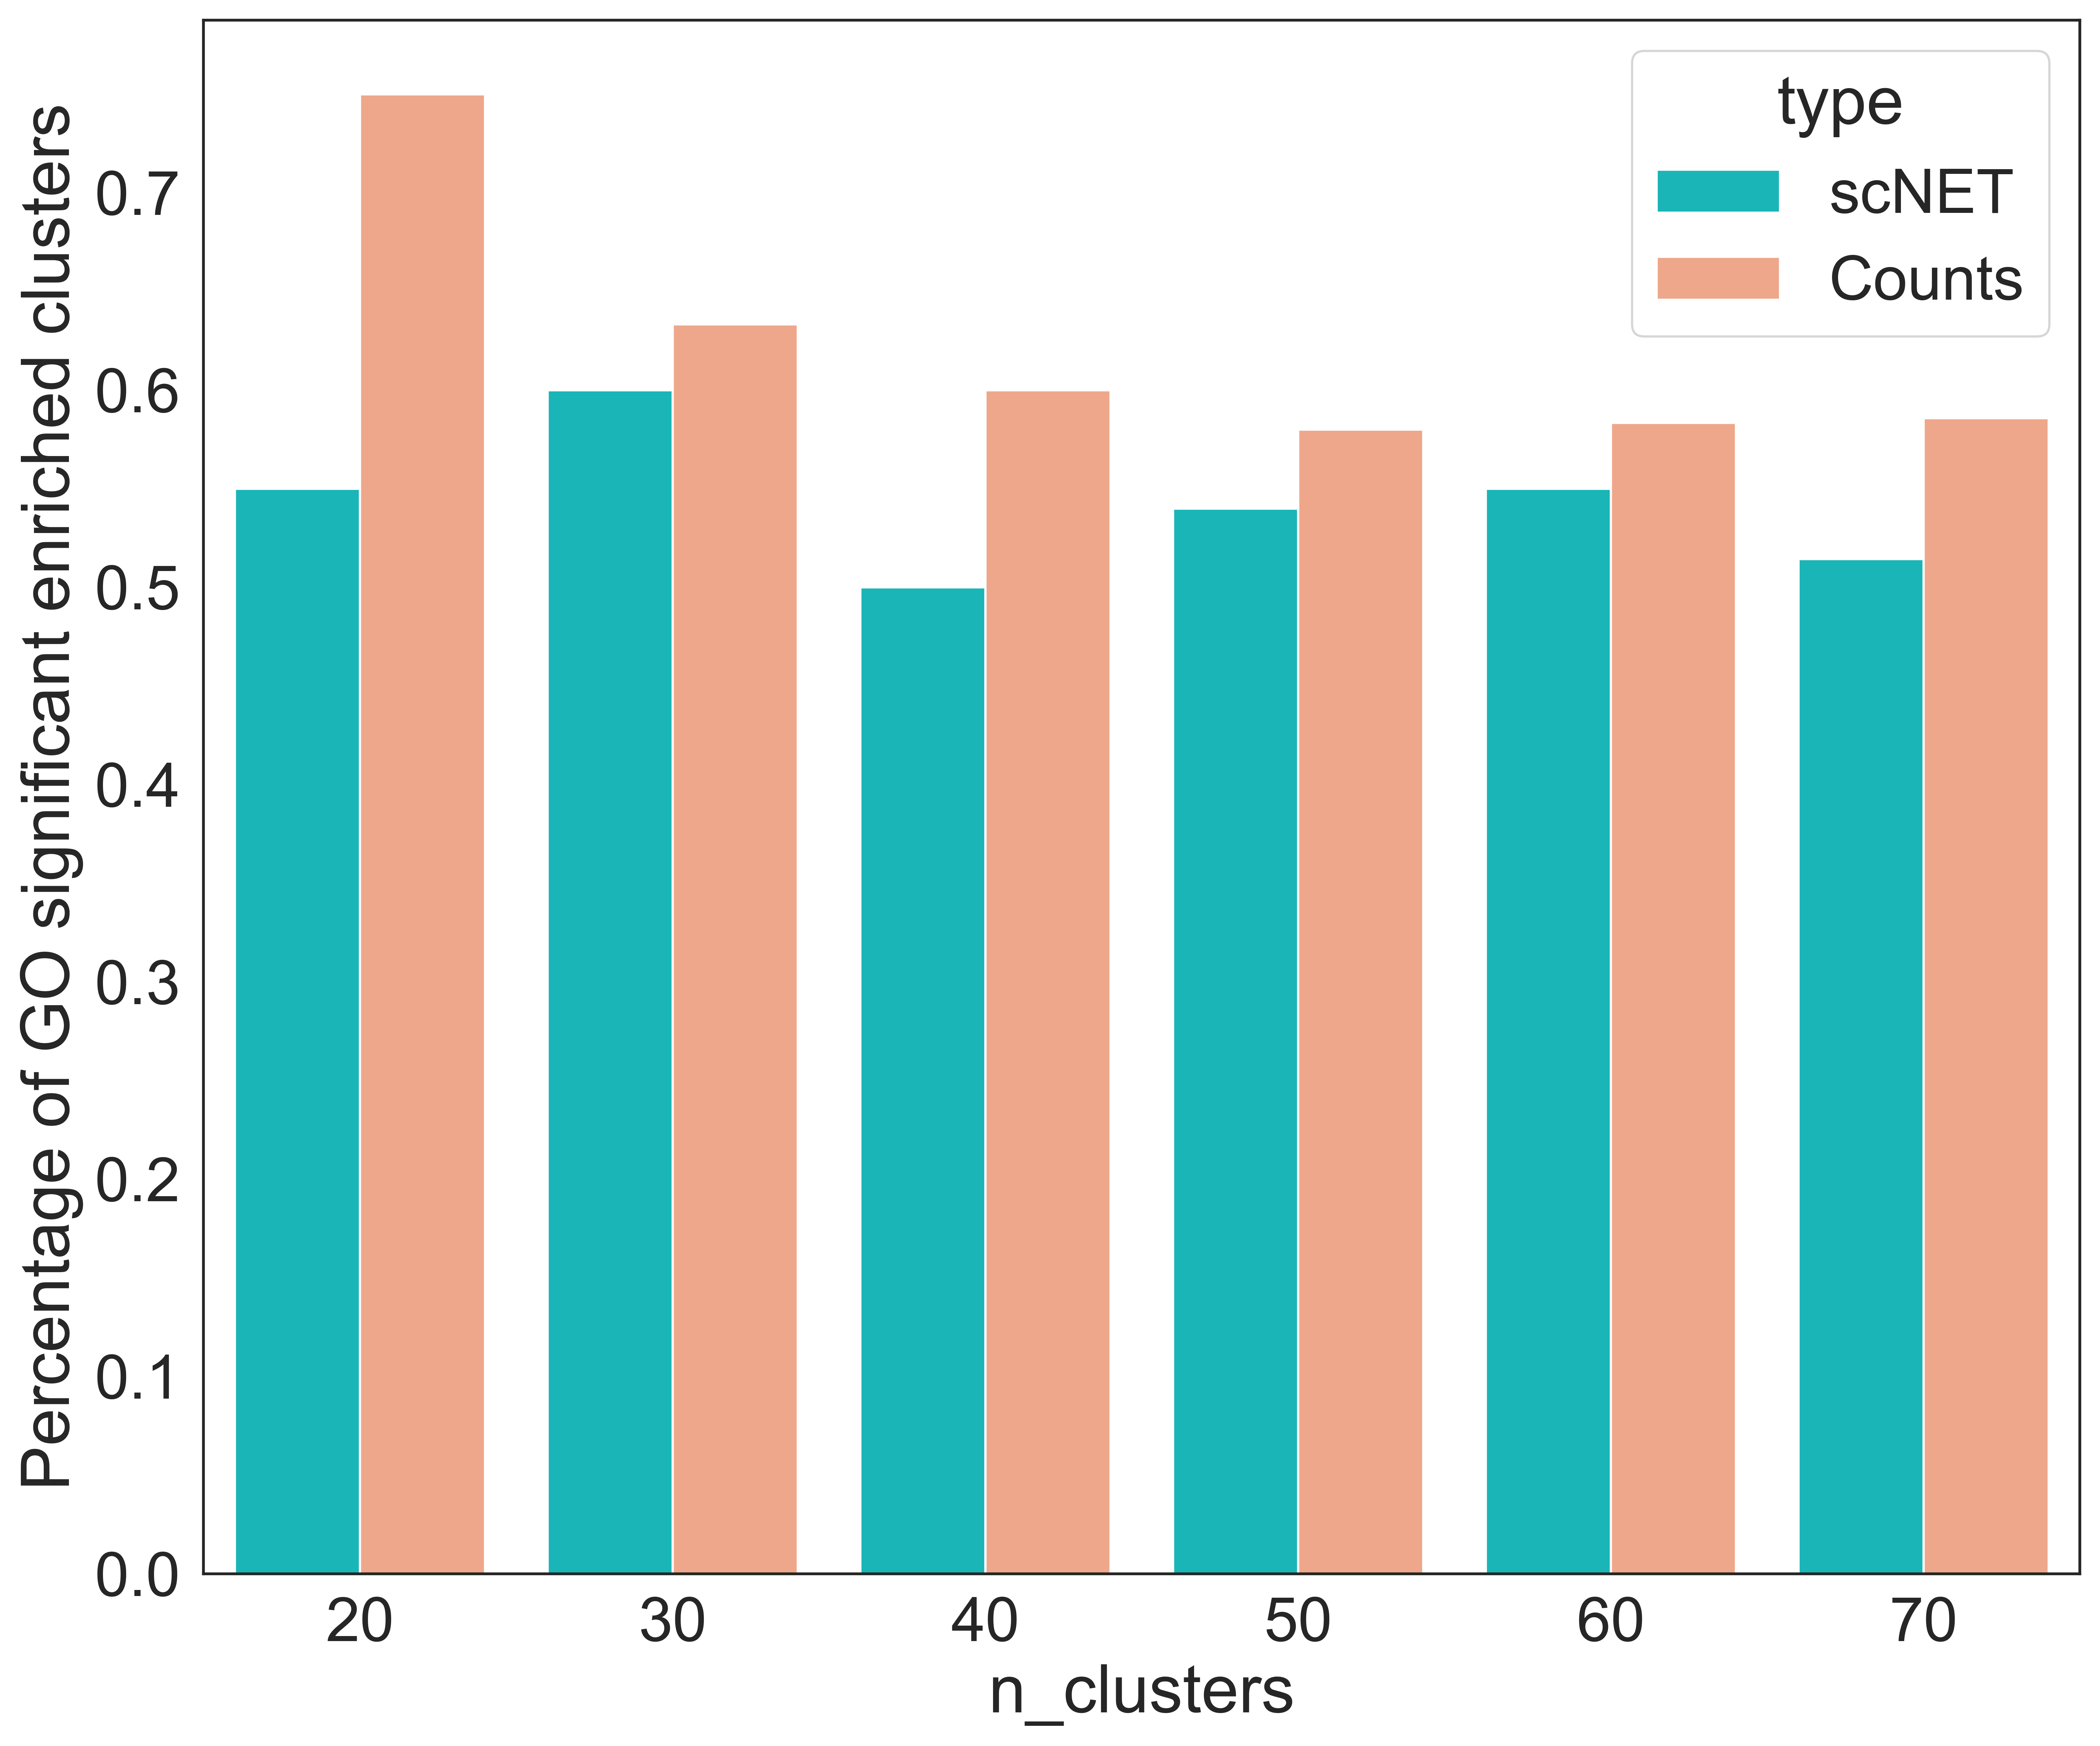

In [66]:
results_embedd, results_counts  = cen.run_p_enr_on_range_clusterts(gene_embedding,[node_feature],node_feature.index)

In [67]:
graph, mode = cen.build_co_embeded_network(gene_embedding, node_feature)
mode

0.4866961338679582

/Users/ronsheinin/Desktop/scNET/coEmbeddedNetwork.py:184: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(ax=ax, data=df,x="Method", y="ROCAUC", palette=custom_palette)


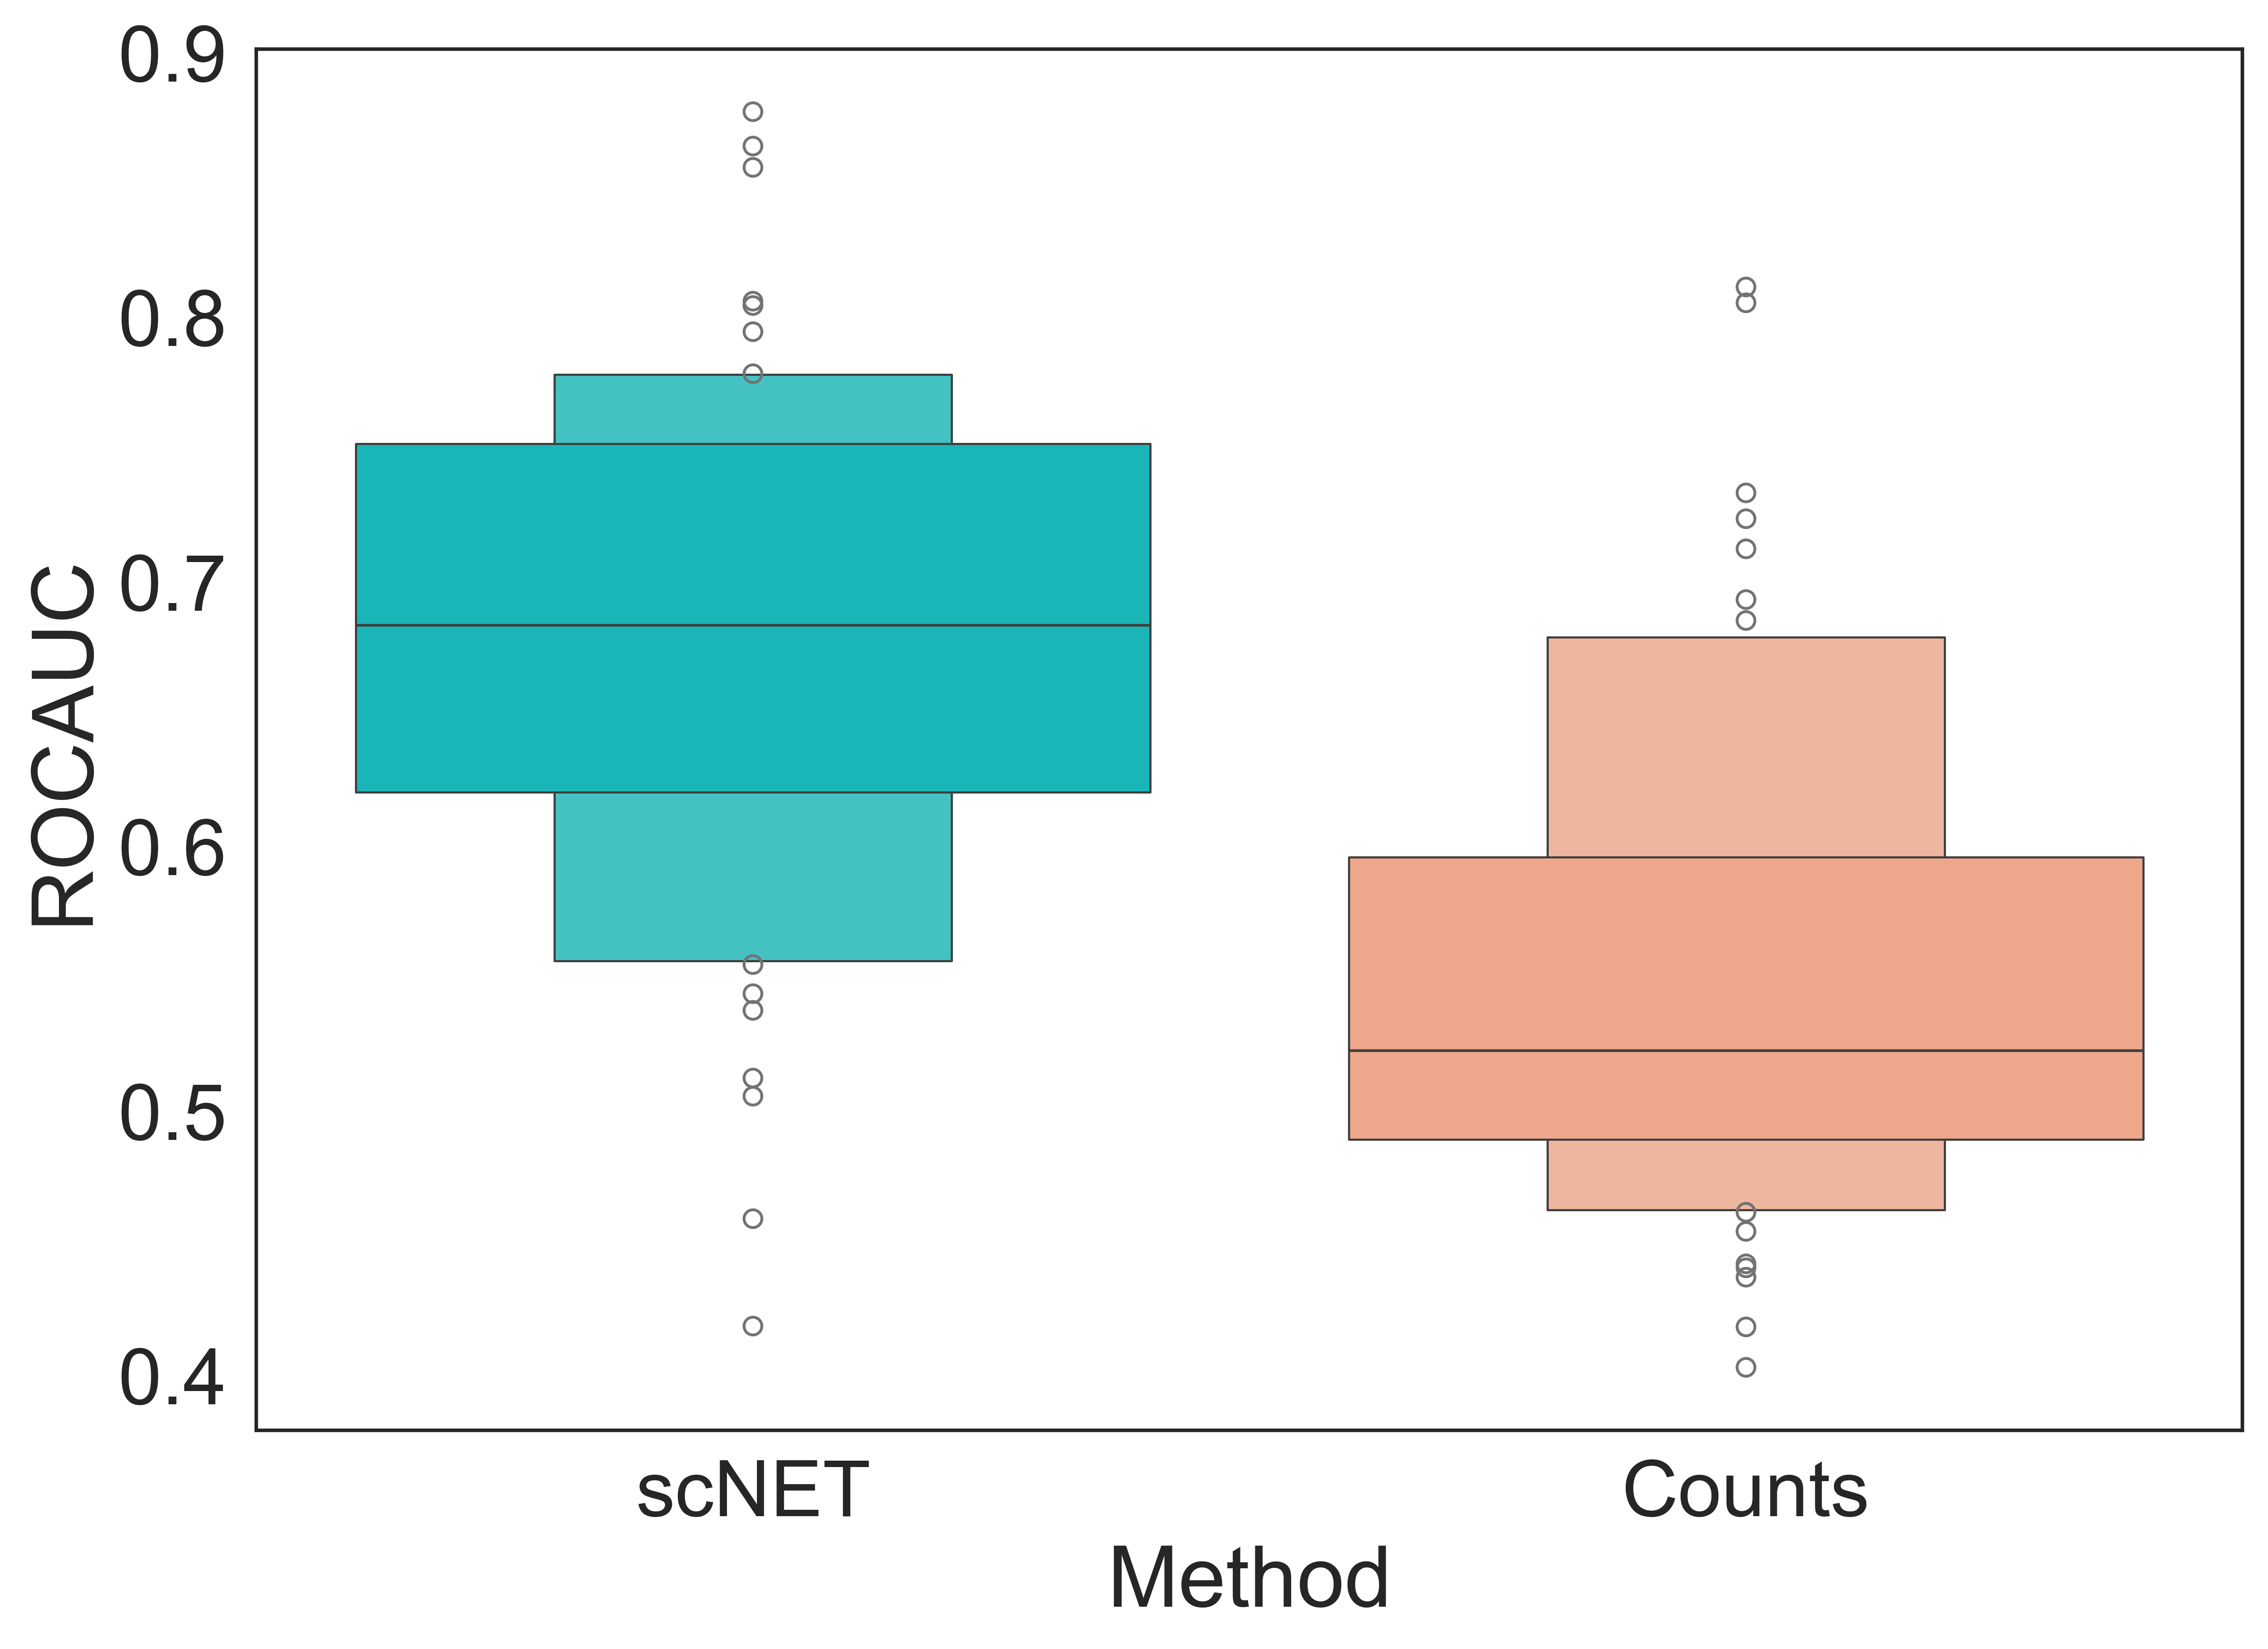

,ROCAUC,Method
0,0.610568,scNET
1,0.459490,scNET
2,0.555533,scNET
3,0.719477,scNET
4,0.609622,scNET
...,...,...
95,0.508048,Counts
96,0.562468,Counts
97,0.693495,Counts
98,0.437379,Counts


In [68]:
cen.predict_kegg(gene_embedding,node_feature)